In [5]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

1.13.0-rc2


# Tensorflow Tutorial on MNIST Fashion Dataset
### 1.0 Download dataset

In [11]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


### 2.0 Preprocess data

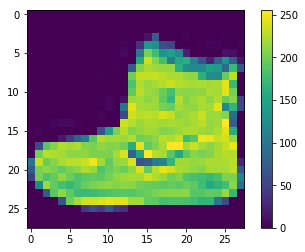

In [16]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [18]:
## Set data between 0 and 255
train_images = train_images / 255.0

test_images = test_images / 255.0

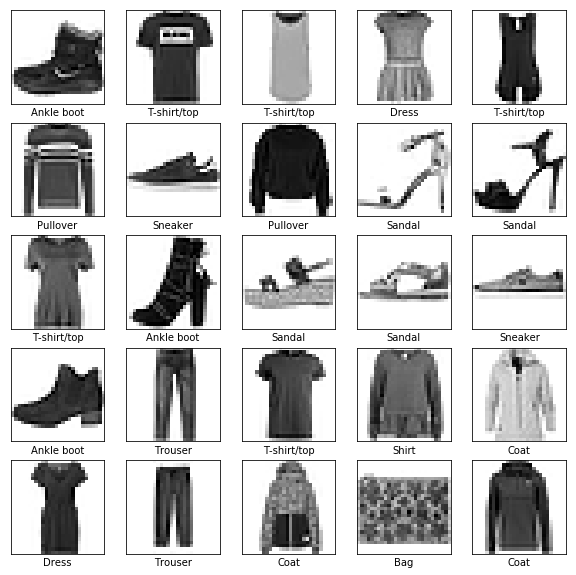

In [20]:
## Print first 28 images for training data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Setup the layers

The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. And, hopefully, these representations are more meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, like tf.keras.layers.Dense, have parameters that are learned during training.

In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely-connected, or fully-connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer is a 10-node softmax layer—this returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.



### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

- Loss function —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
- Optimizer —This is how the model is updated based on the data it sees and its loss function.
- Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### Train the model

Training the neural network model requires the following steps:

 - Feed the training data to the model—in this example, the train_images and train_labels arrays.
 - The model learns to associate images and labels.
 - We ask the model to make predictions about a test set—in this example, the test_images array. We verify that the predictions match the labels from the test_labels array.

To start training, call the model.fit method—the model is "fit" to the training data:

In [38]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 2s 29us/sample - loss: 0.4129 - acc: 0.8550
Epoch 2/20
60000/60000 [==============================] - 2s 29us/sample - loss: 0.4072 - acc: 0.8570
Epoch 3/20
60000/60000 [==============================] - 2s 29us/sample - loss: 0.4019 - acc: 0.8585
Epoch 4/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.3967 - acc: 0.8597
Epoch 5/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.3921 - acc: 0.8602
Epoch 6/20
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3878 - acc: 0.8625
Epoch 7/20
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3838 - acc: 0.8638
Epoch 8/20
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3795 - acc: 0.8656
Epoch 9/20
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3760 - acc: 0.8669
Epoch 10/20
60000/60000 [==============================] - 2s 29us/sample - loss: 

In [39]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 10us/sample - loss: 0.3922 - acc: 0.8596


In [40]:
predictions = model.predict(test_images)

In [41]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


/home/hw16471/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


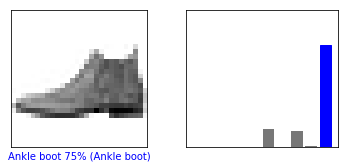

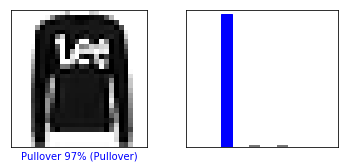

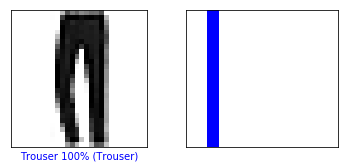

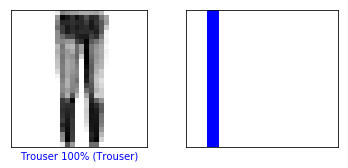

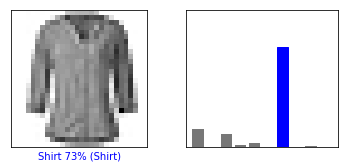

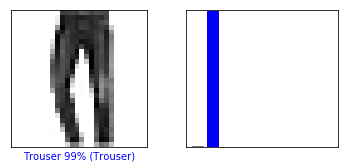

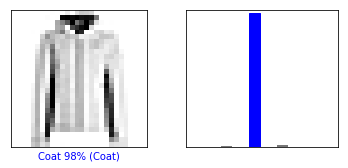

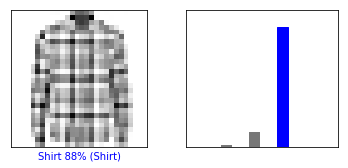

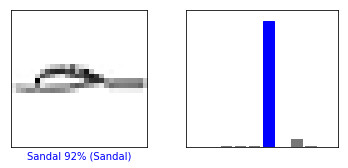

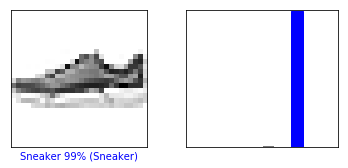

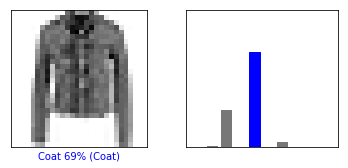

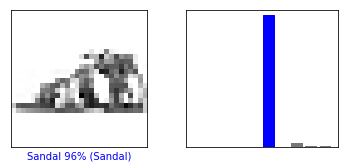

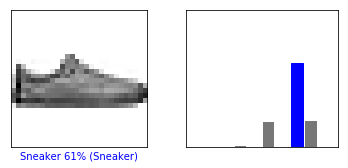

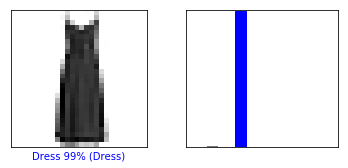

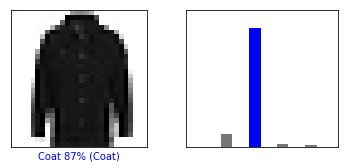

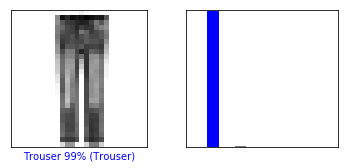

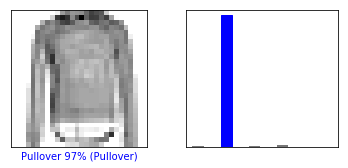

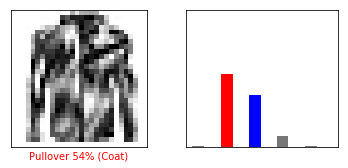

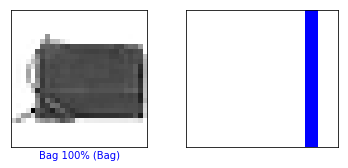

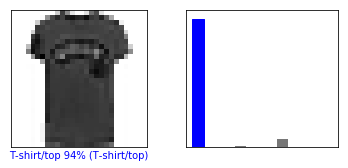

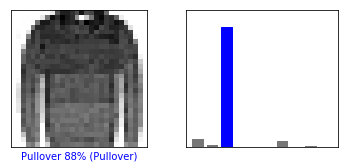

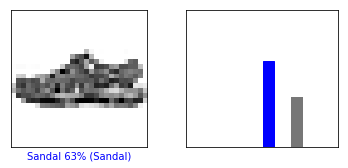

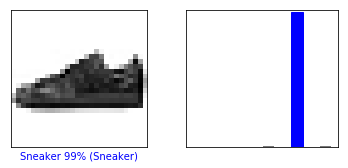

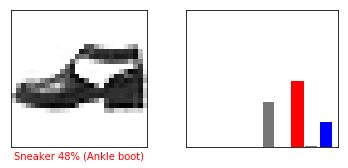

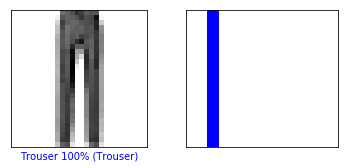

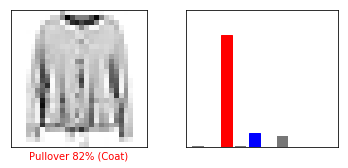

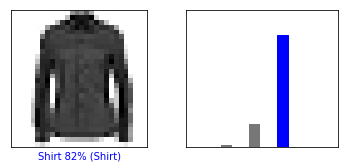

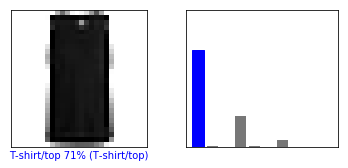

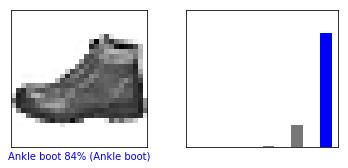

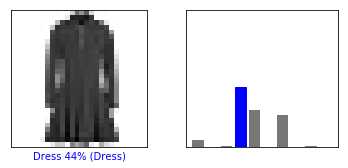

In [44]:
n=30

for i in range(n):
    plt.figure(figsize=(6,3*n))
    plt.subplot(n,2,i*2+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(n,2,i*2+2)
    plot_value_array(i, predictions,  test_labels)